/home/sadid/anaconda3/lib/python3.12/site-packages/torch/cuda/__init__.py:141: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


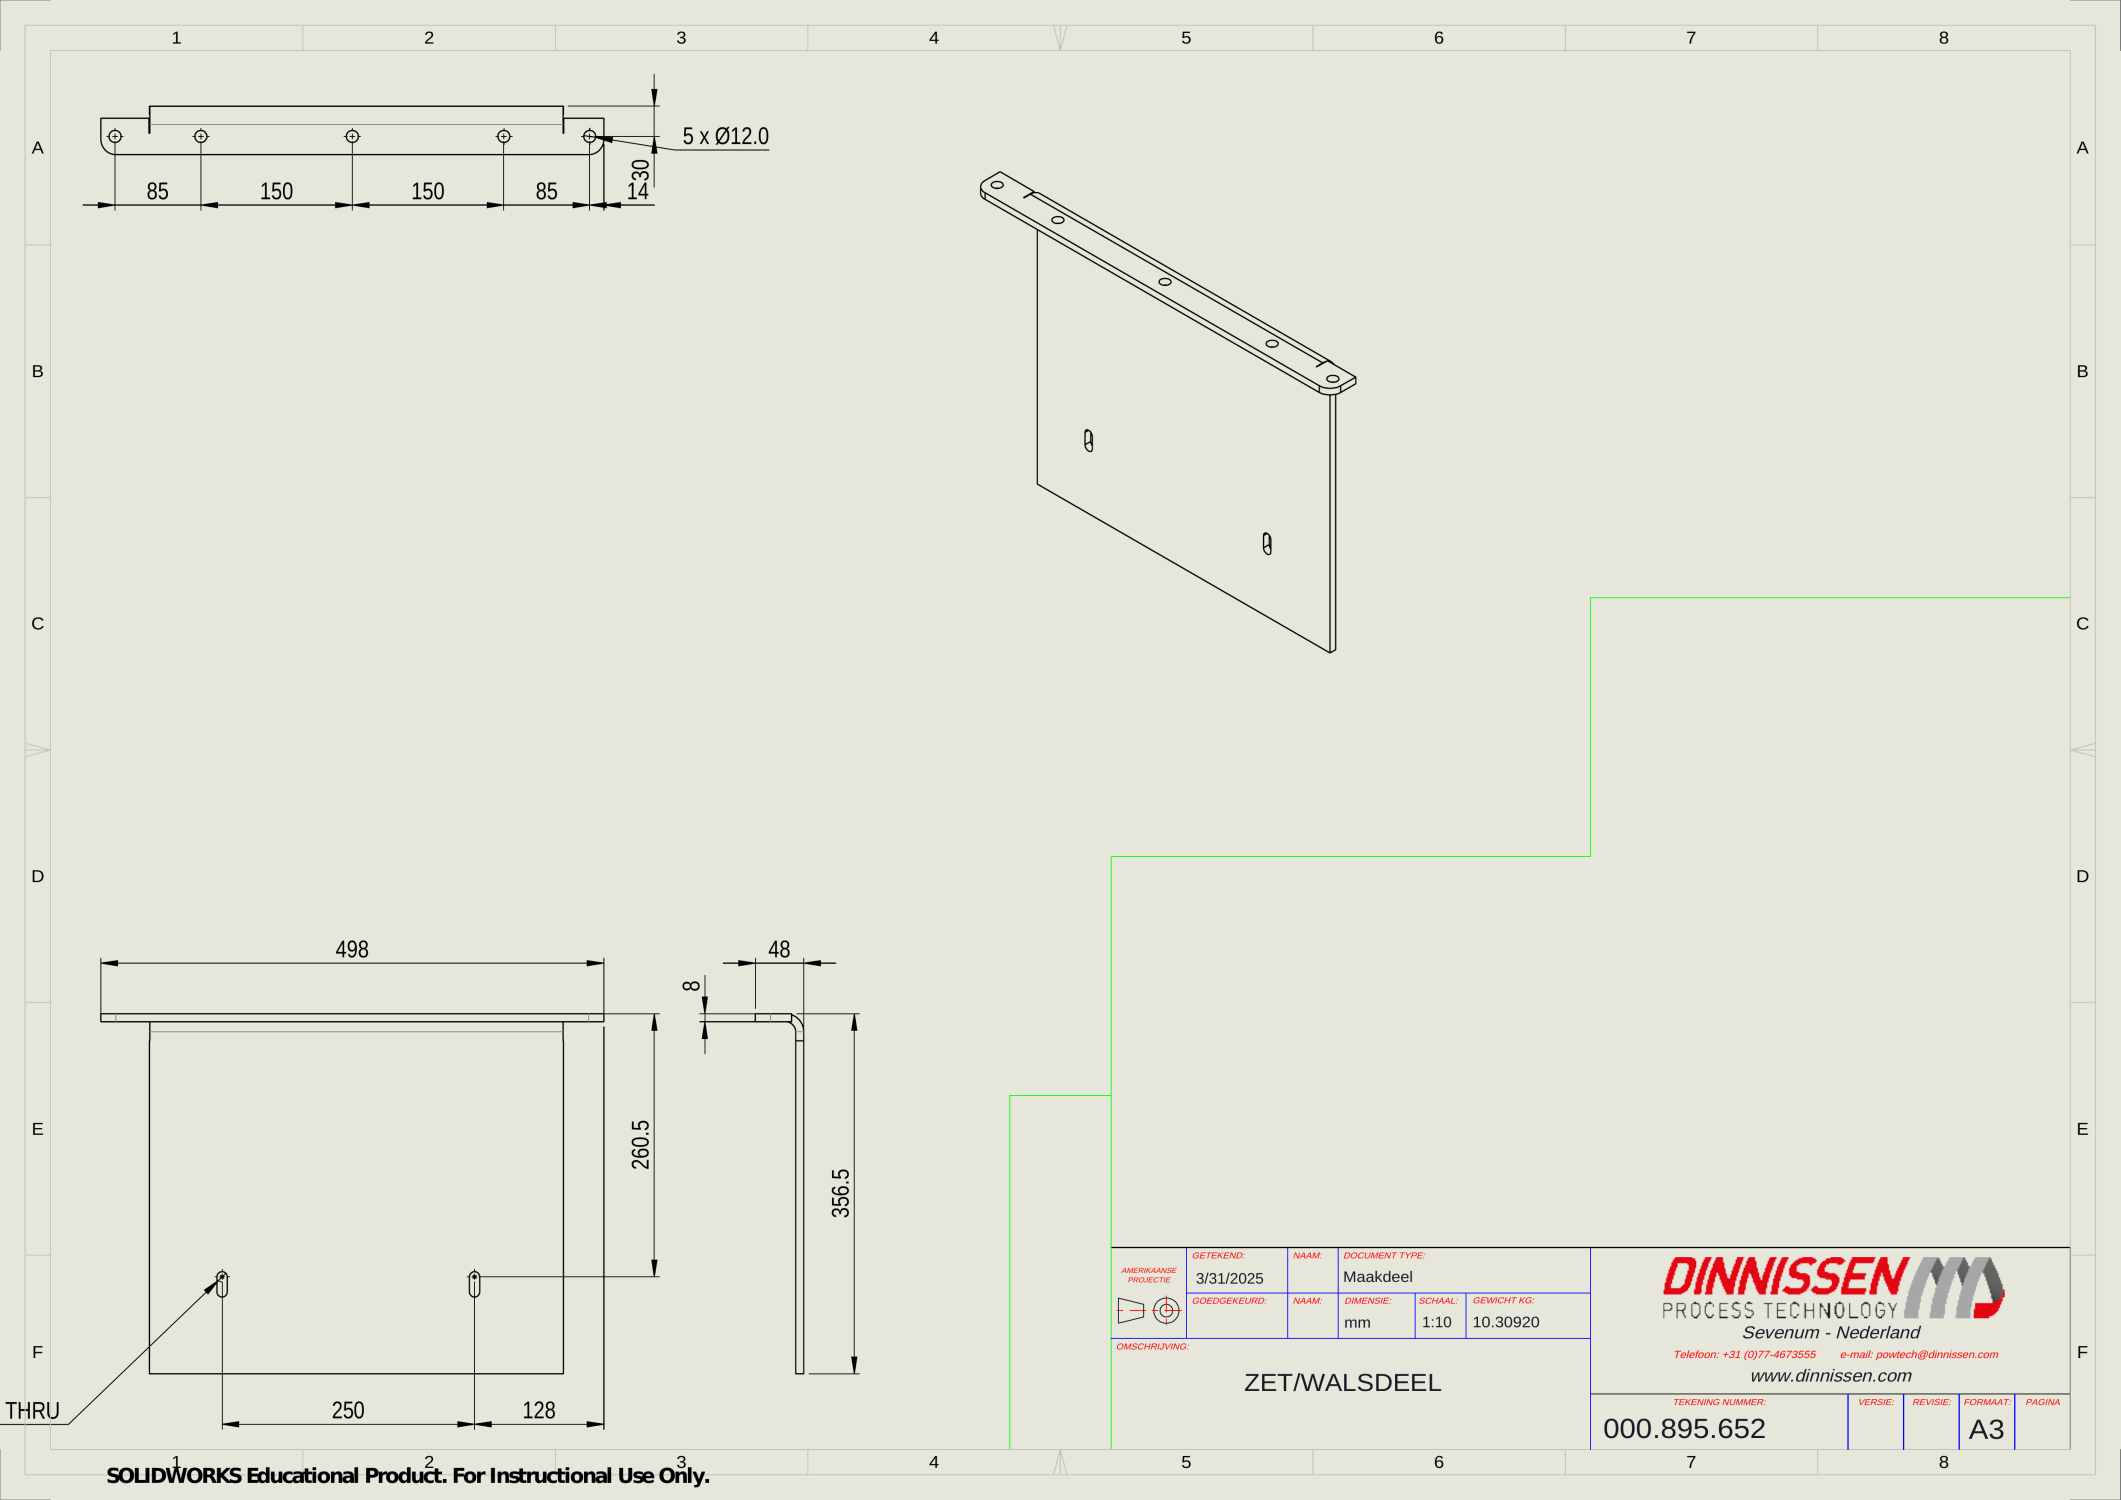

In [1]:
from glob import glob
import os

import cv2
import numpy as np
from PIL import Image
from pdf2image import convert_from_path
from imutils import resize
from sklearn.metrics import euclidean_distances
from tqdm import tqdm
from scoring import *
from border_and_title import *

# f = "../../data/original/Ugly/10.pdf"
# f = "../../data/original/Ugly/2.pdf"
# f = "../../data/original/Ugly/3.pdf"
f = "../../data/original/Ugly/000.895.652.pdf"
# f = "../../data/original/Good/300-014823.pdf"
# f = "../../data/original/Good/300-014822.pdf"

font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 1
color = (255, 0, 0)
thickness = 2

pages = convert_from_path(f, dpi=300)
img = np.array(pages[0])
img = im_resize(img)
img_comp = img.copy()

Image.fromarray(img_comp)

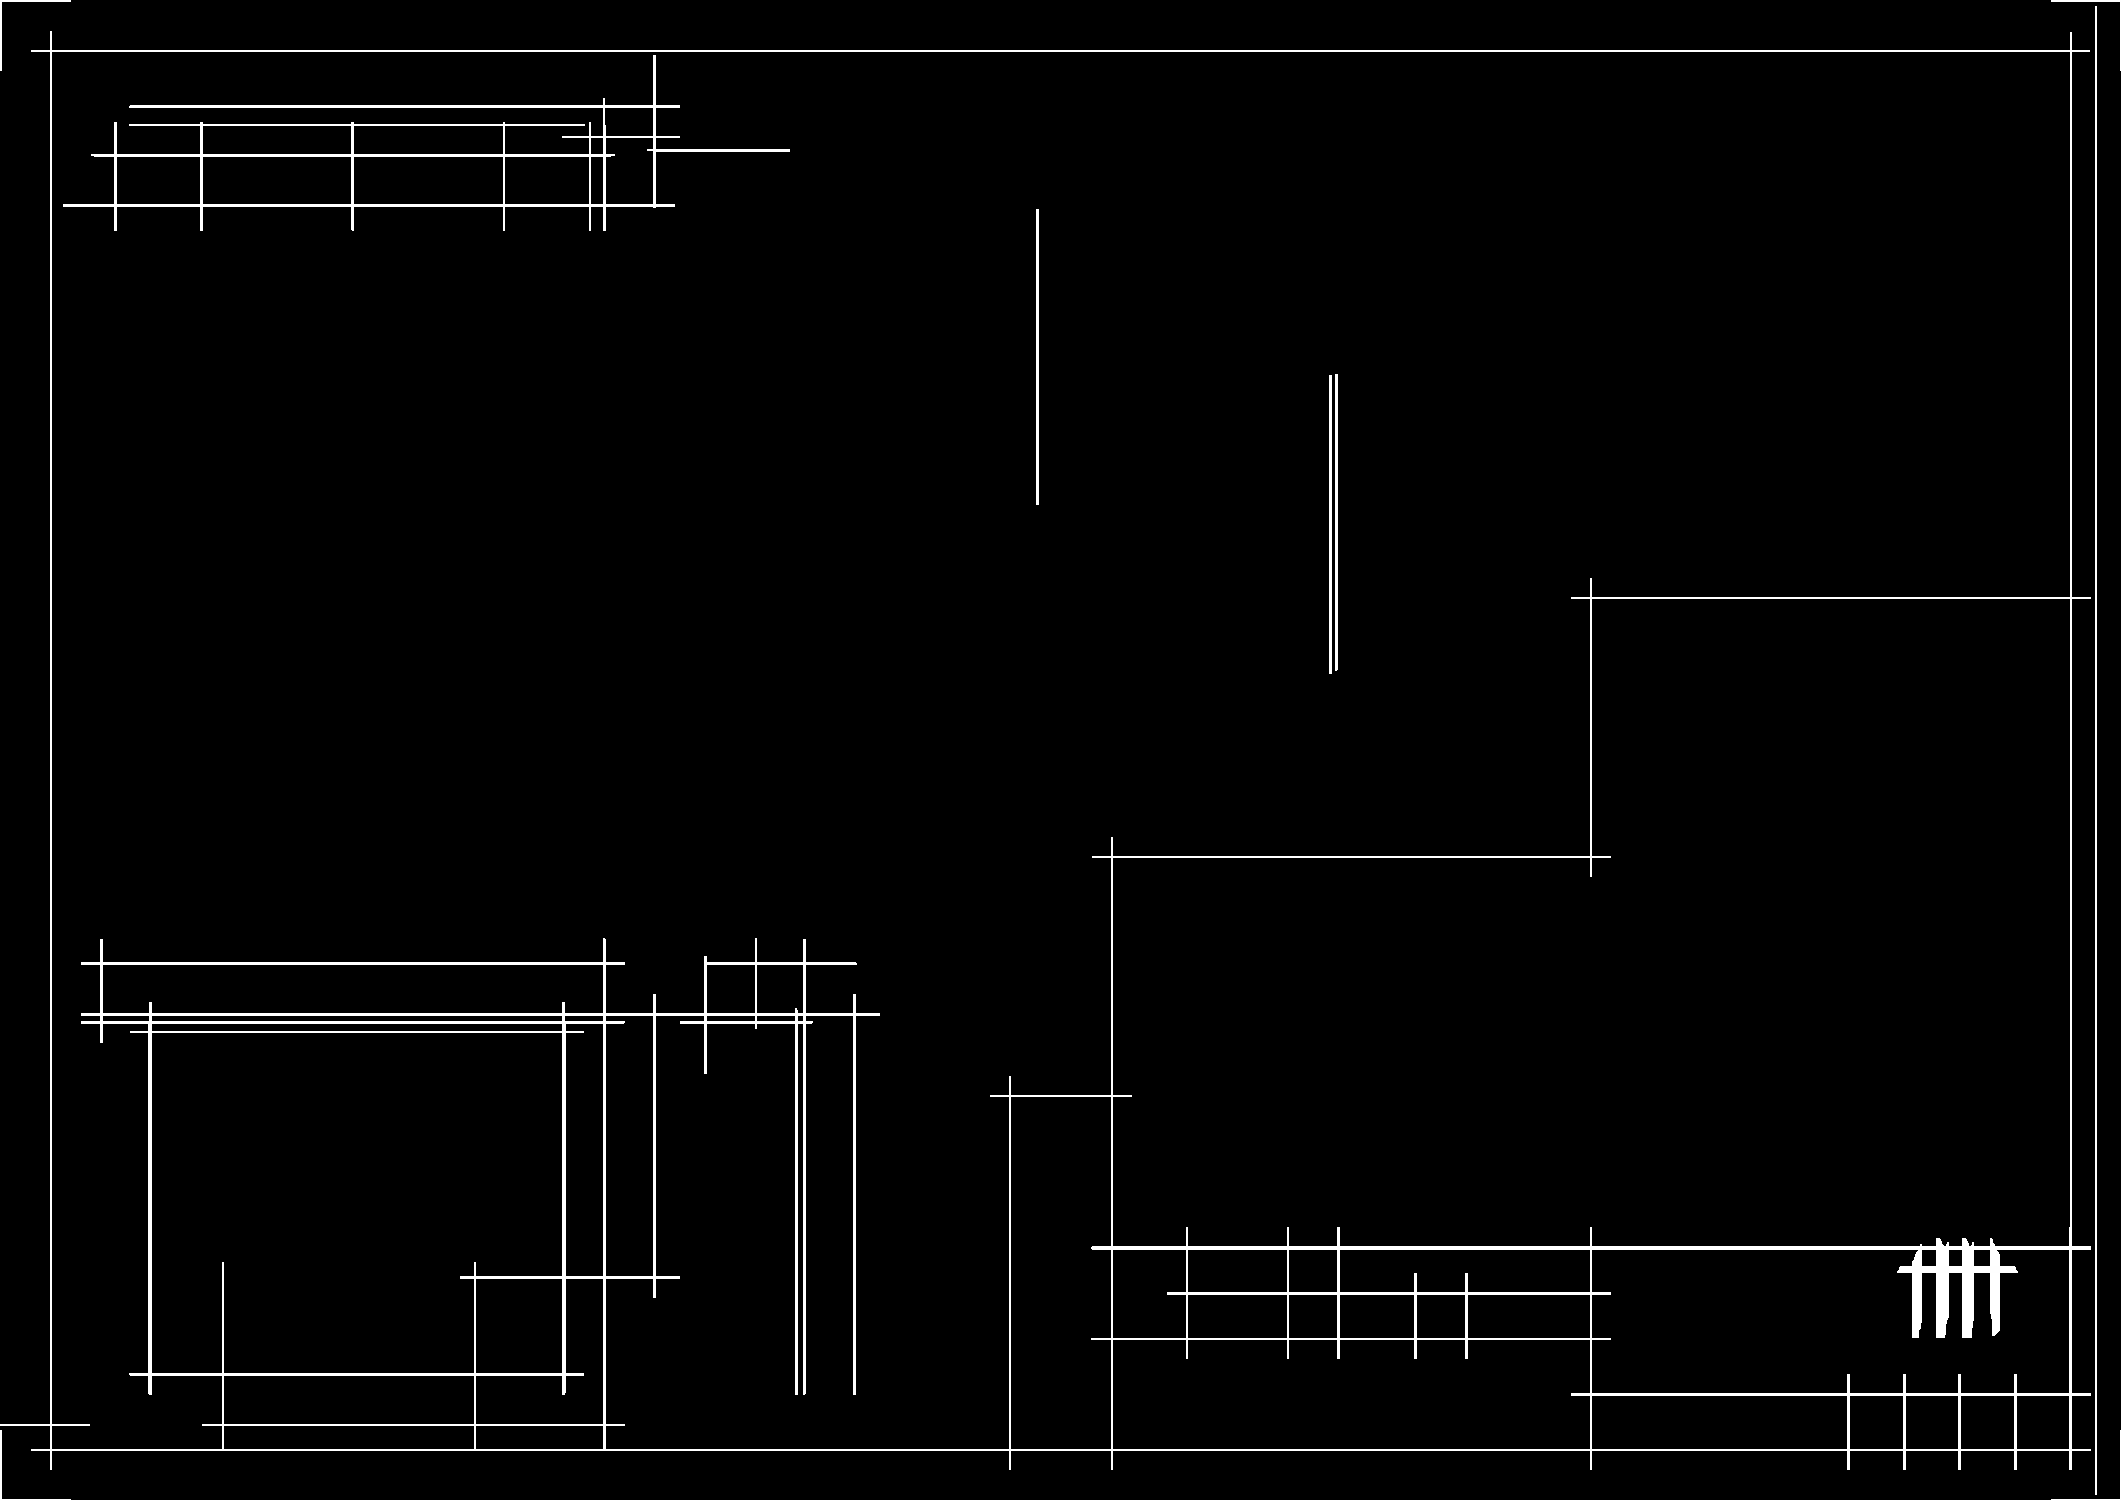

In [2]:
font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 1
color = (255, 0, 0)
thickness = 2

im_h, im_w, _ = img.shape

sorted_indices, contours, hierarchy_area = detect_objects(img)

contours, line_90, ocr_result, mask_comp, mask, lines_90_h, lines_90_v = detect_probable_title_sections(img, return_states=True)

Image.fromarray(mask)

In [3]:
lines_90_h

array([[  31, 1449, 2090, 1449],
       [  31,   50, 2089,   50]], dtype=int32)

In [4]:
lines_90_v

array([[2096, 1494, 2096,    6],
       [2071, 1469, 2071,   32],
       [  51, 1469,   51,   31]], dtype=int32)

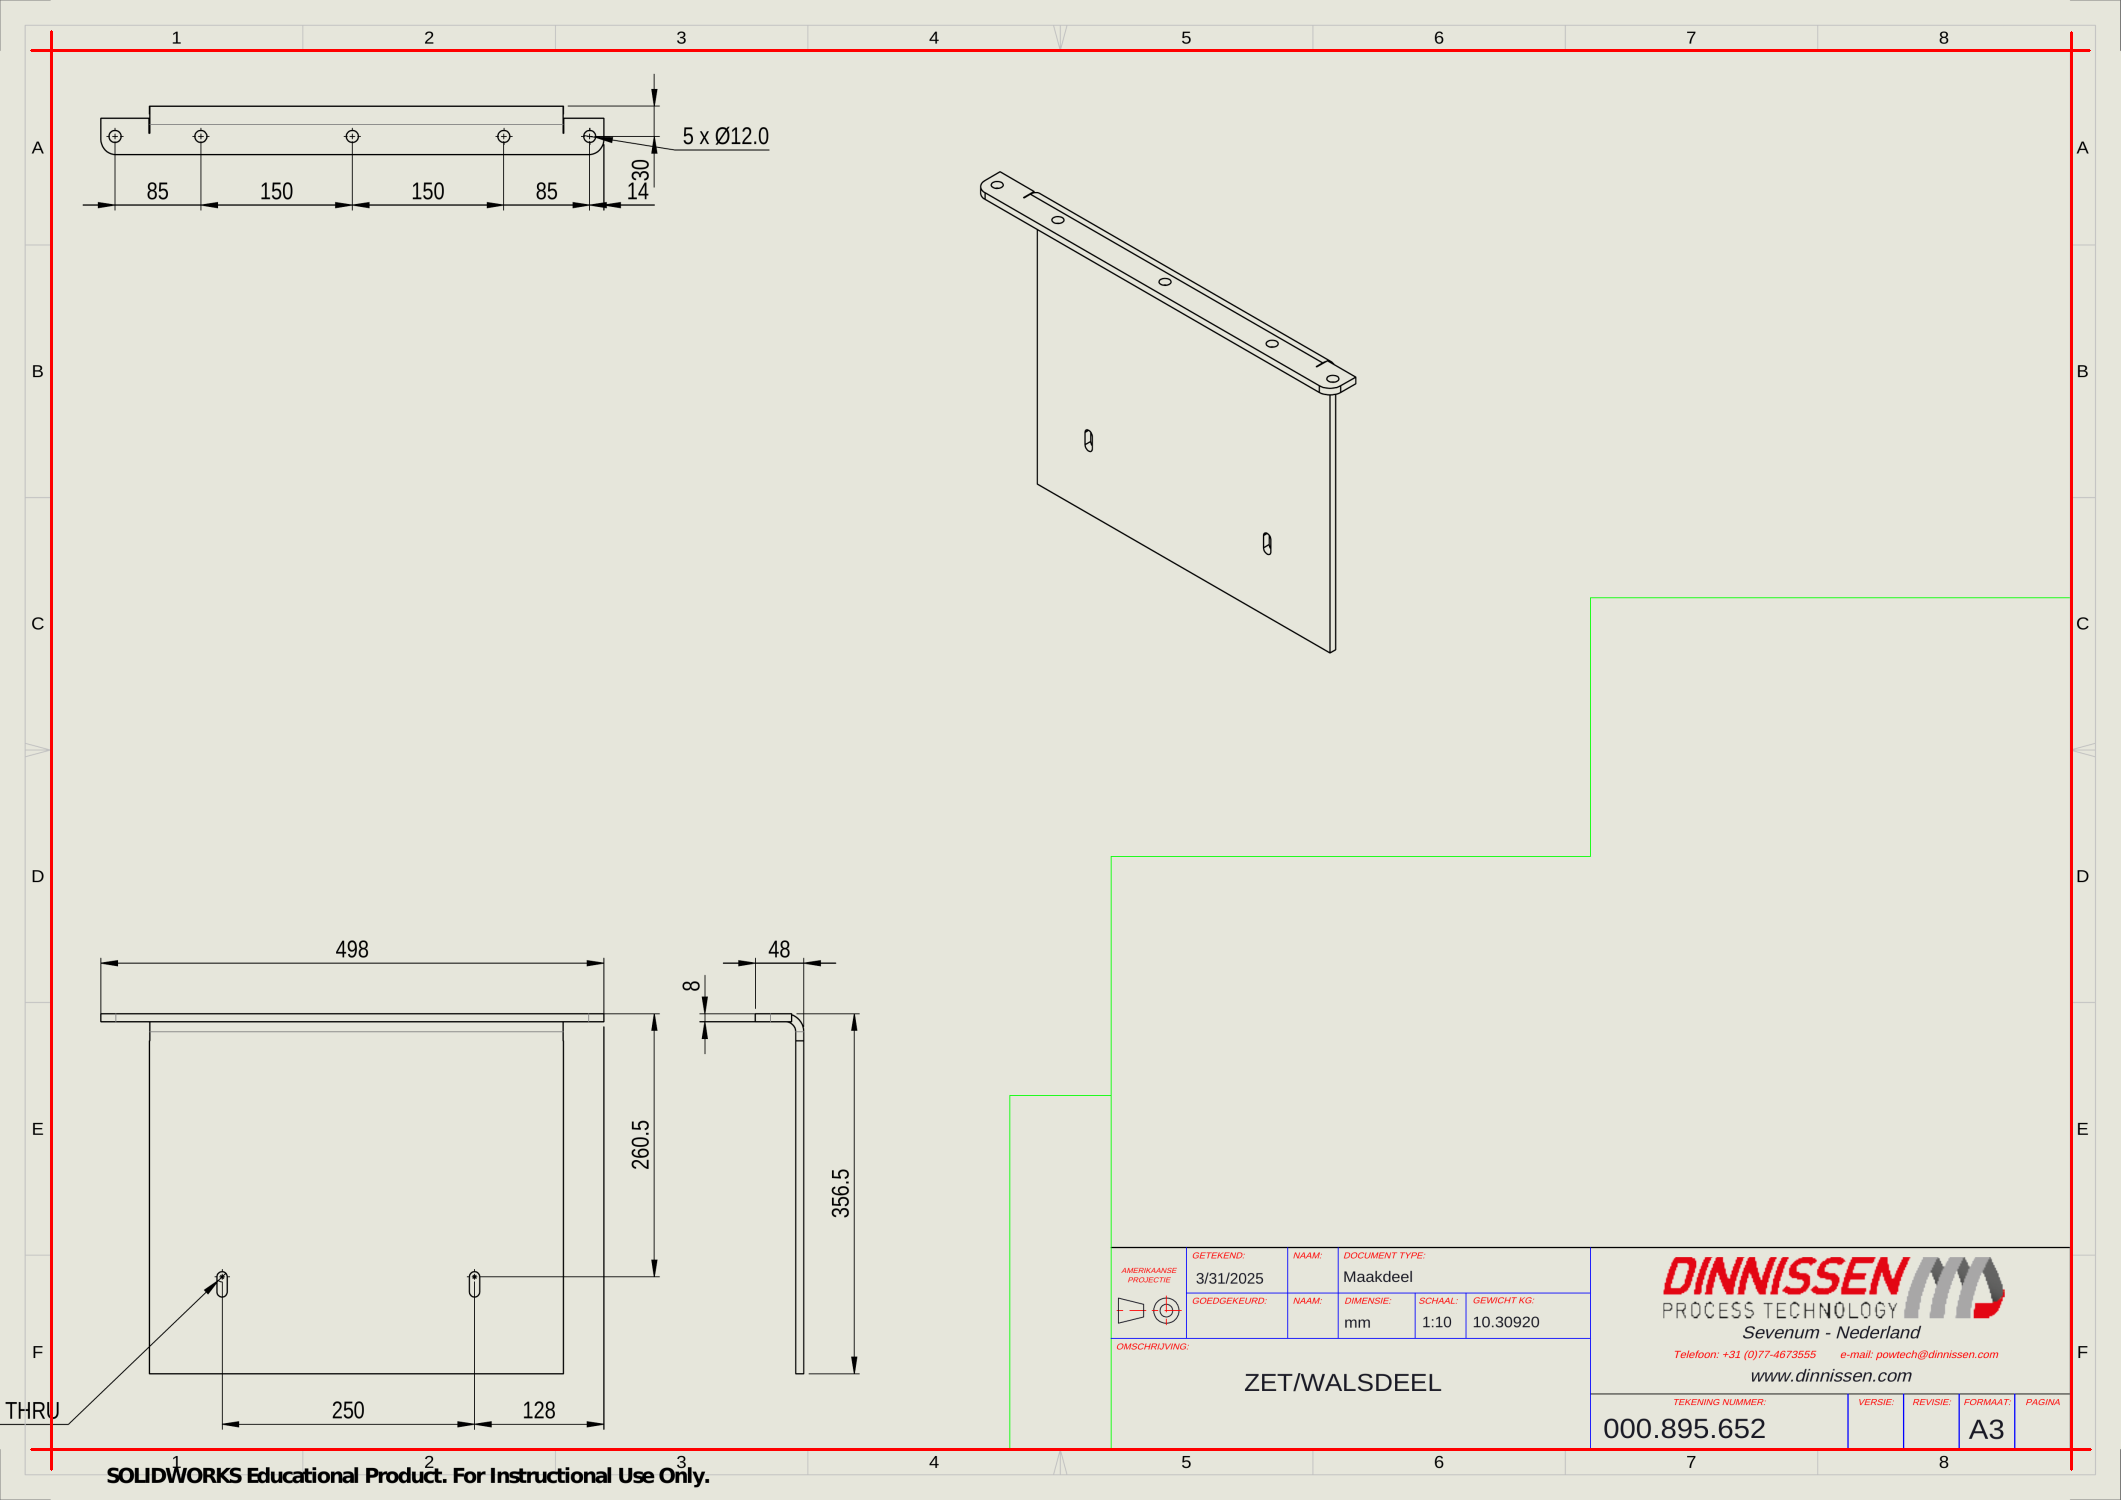

In [28]:
img_comp = img.copy()


# print(x1, y1, x2, y2)

def decide_inner(line_1, line_2):
    x1, y1, x2, y2 = abs(line_1 - line_2)
    if y1 > 100:
        x1, y1, x2, y2 = line_1
    else:
        x1, y1, x2, y2 = line_2

    return x1, y1, x2, y2


inner_border_lines = [
    decide_inner(lines_90_h[0], lines_90_h[1]),
    decide_inner(lines_90_h[-1], lines_90_h[-2]),
    decide_inner(lines_90_v[0], lines_90_v[1]),
    decide_inner(lines_90_v[-2], lines_90_v[-1])
]

for line in inner_border_lines:
    x1, y1, x2, y2 = line
    cv2.line(img_comp, (x1, y1), (x2, y2), color, thickness)

# x1, y1, x2, y2 = lines_90_v[2]
# print(x1, y1, x2, y2)
# cv2.line(img_comp, (x1, y1), (x2, y2), color, thickness)

Image.fromarray(img_comp)